In [1]:
import pandas as pd
df = pd.read_csv("Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
df["Extracurricular Activities"] = le.fit_transform(df["Extracurricular Activities"])

In [20]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [32]:
import numpy as np
val =df["Performance Index"].unique()
newval = np.sort(val)
print(newval)

[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.
  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.
  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.
  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.
  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.
  94.  95.  96.  97.  98.  99. 100.]


In [35]:
from sklearn.preprocessing import OrdinalEncoder
order = newval
oe = OrdinalEncoder(categories=[order])
df["Performance Index"] = oe.fit_transform(df[["Performance Index"]])

In [39]:
X =df.iloc[:,0:5]
y =df.iloc[:,-1]
# print(X)

In [40]:
import numpy as np
X =np.array(X)
X

array([[ 7, 99,  1,  9,  1],
       [ 4, 82,  0,  4,  2],
       [ 8, 51,  1,  7,  2],
       ...,
       [ 6, 83,  1,  8,  5],
       [ 9, 97,  1,  7,  0],
       [ 7, 74,  0,  8,  1]], dtype=int64)

In [41]:
print(X.shape)

(10000, 5)


In [48]:
y = np.array(y)
print(len(X[0]))

5


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=2)



In [61]:
w=np.ones(5)
b =0
print(b)
print(w)

0
[1. 1. 1. 1. 1.]


In [83]:

l1=[1,2,3,4]
l2=[[2,2,2,2],[3,3,3,3],[1,1,1,1]]
l3 =np.array(l2)
print([x.mean() for x in l3])
store = [[w*x for w,x in zip(l1,r)]for r in l2]
preds =[sum(x)+1 for x in store]
# double comprehension one for loop through l2 and one for both common
# print(store)
# print(preds)

[2.0, 3.0, 1.0]


In [75]:
y_train=y_train.reshape(8000)

In [87]:

def predict(Xt,w,b):
    preds =[[w*x for w,x in zip(w,row)]for row in Xt]
    prediction =[sum(x)+b for x in preds]
    
    # print(prediction)
    # print(len(prediction))#800
    return prediction


def improve(cost,ya,X_train,w,b,m):
    lr=0.001
    for i in range(100):
        #decrease value of w and b if cost is negative else increase both
        # prediction =predict(X_train,w,b)
        # val=[(ya[i]-prediction[i])*X_train[i] for i in range(len(X_train))]
        # w = (sum(val)*lr)/len(X_train)
        # val2=[(ya[i]-prediction[i]) for i in range(len(X_train))]
        # b=(sum(val2)*lr)/len(X_train)
        # print(b)
        w = [weight+lr*cost*mean for weight,mean in zip(w,m)]
        b += lr*cost
        prediction =predict(X_train,w,b)
        cost  = calculate_cost(ya,prediction)

        
        
    return (cost,w,b)
    
def calculate_cost(ya,yp):
    # print("here",ya,yp)
    # print((ya-yp))
    error = [(ya[i]-yp[i]) for i in range(len(ya))]
    cost = sum(error)/len(ya)

    return cost
def fit_model(X_train,y_train,w,b):
    
    prediction = predict(X_train,w,b)
    cost  = calculate_cost(y_train,prediction)
    # print(cost)
    m=[x.mean() for x in X_train]
    cost,w,b = improve(cost,y_train,X_train,w,b,m)
    # print("training",cost)
    prediction =predict(X_train,w,b)
    cost  = calculate_cost(y_train,prediction)
    # # print(prediction)
    # # print(cost,w,b)
    return prediction,w,b,cost



# fit_model(X_train,y_train,w,b)
prediction,w,b,cost = fit_model(X_train,y_train,w,b)
print("printing w",w)

print("printing b",b)


print("printing imp training cost",cost)
# print(y_train)

    


printing w [0.482084437244928, 0.5208070961425032, 0.6708573993706086, 0.6418154051974266, 0.4578827754339431]
printing b -0.024201661810984678
printing imp training cost -1.06403774680075e-15


In [91]:
print(prediction[3])
print(y_train[3])

39.57555624005539
30.0


In [97]:
print(X_train.shape)
y_train=y_train.reshape(8000)
print(y_train.shape())


(8000, 5)


TypeError: 'tuple' object is not callable

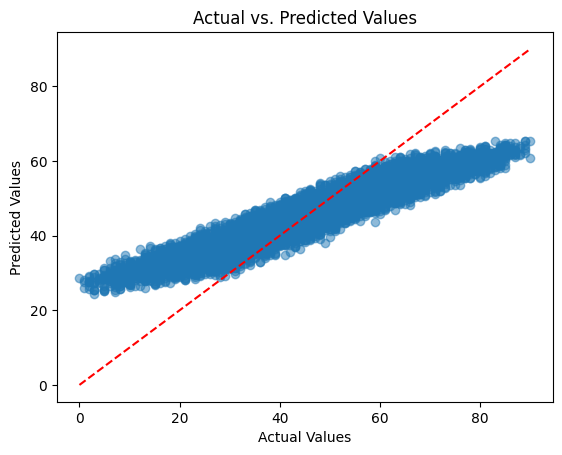

In [99]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_train, prediction, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')  # 45-degree line
plt.show()
